In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings; warnings.filterwarnings('ignore', message='elementwise')

def plot_mst(model, cmap='rainbow'):
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16);

# Dataset

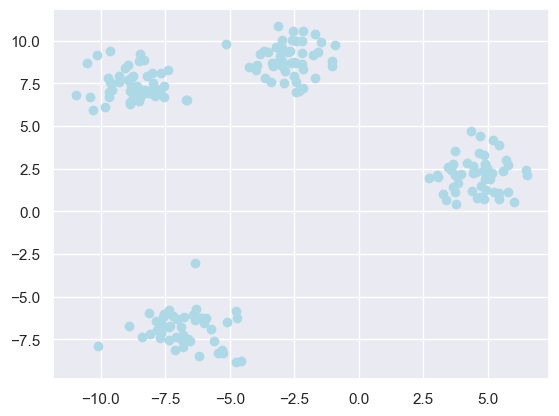

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, centers=4, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c='lightblue');

Thấy bằng mắt bộ dữ liệu có 4 cụm rõ ràng

# MST Clustering

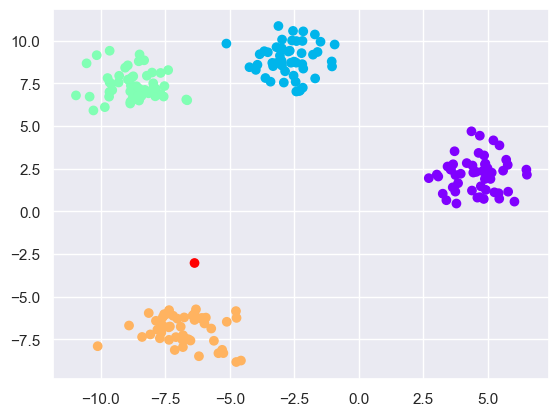

In [6]:
from mst_clustering import MSTClustering
model = MSTClustering(cutoff_scale=2, approximate=False)
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow');

Kết quả phân cụm được tính bằng cách đầu tiên xây dựng một đồ thị làm dữ liệu đầu vào, các node là các điểm trong dataset, các cạnh được xác định bằng khoảng cách giữa các node. Sau đó tìm cây MST trên đồ thị đưa vào.
Biểu diễn cây MST trong hình bên trái như sau:

C:\Users\dophi\AppData\Local\Temp\ipykernel_1472\2977907449.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


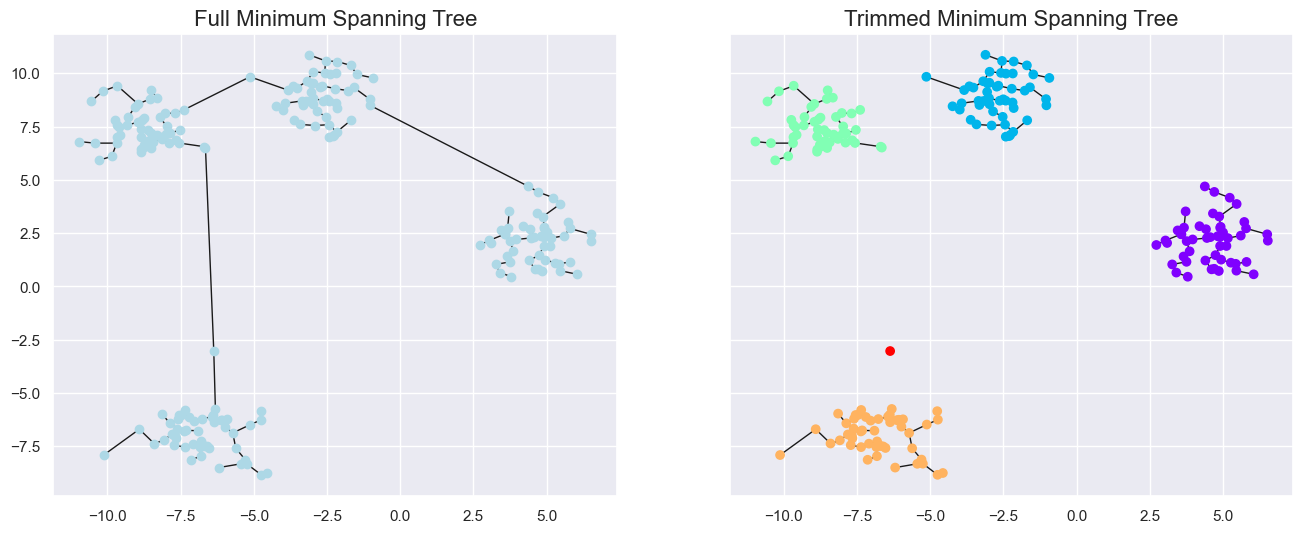

In [7]:
plot_mst(model)

Các cụm được tạo ra (hình bên phải) bằng cách loại bỏ tất cả các cạnh đồ thị lớn hơn giá trị của tham số cutoff_scale (ở đây = 2). Các điểm sau khi cắt bỏ mà vẫn kết nối với nhau thì ở cùng một label.

# Ưu điểm của MST Clustering

1. MST Clustering có khả năng phát hiện các cụm có ranh giới rất không đều
2. Số lượng cụm trong thuật toán không cần chọn sẵn như các thuật toán Kmeans, ...
3. Có thể phát hiện tốt các cụm trong noise background 

# MST Clustering in noise background

C:\Users\dophi\AppData\Local\Temp\ipykernel_1472\923796039.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c='lightblue', cmap='spectral_r')


(-15.0, 15.0)

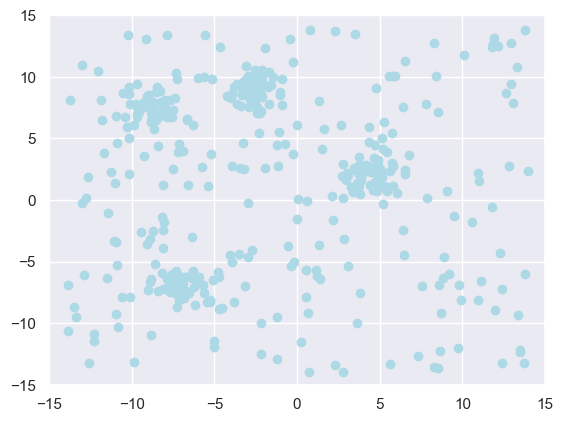

In [8]:
rng = np.random.RandomState(int(100 * y[-1]))
noise = -14 + 28 * rng.rand(200, 2) # size (200, 2) value = (-14 14)

# Thêm dữ liệu nhiễu vào X
X_noisy = np.vstack([X, noise]) # size (400, 2)
y_noisy = np.concatenate([y, np.full(200, -1, dtype=int)]) # 200 noise labels

plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c='lightblue', cmap='spectral_r')
plt.xlim(-15, 15)
plt.ylim(-15, 15)

Có 4 vùng thấy được bằng mắt thường trong dữ liệu nhiễu trên

C:\Users\dophi\AppData\Local\Temp\ipykernel_1472\2977907449.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


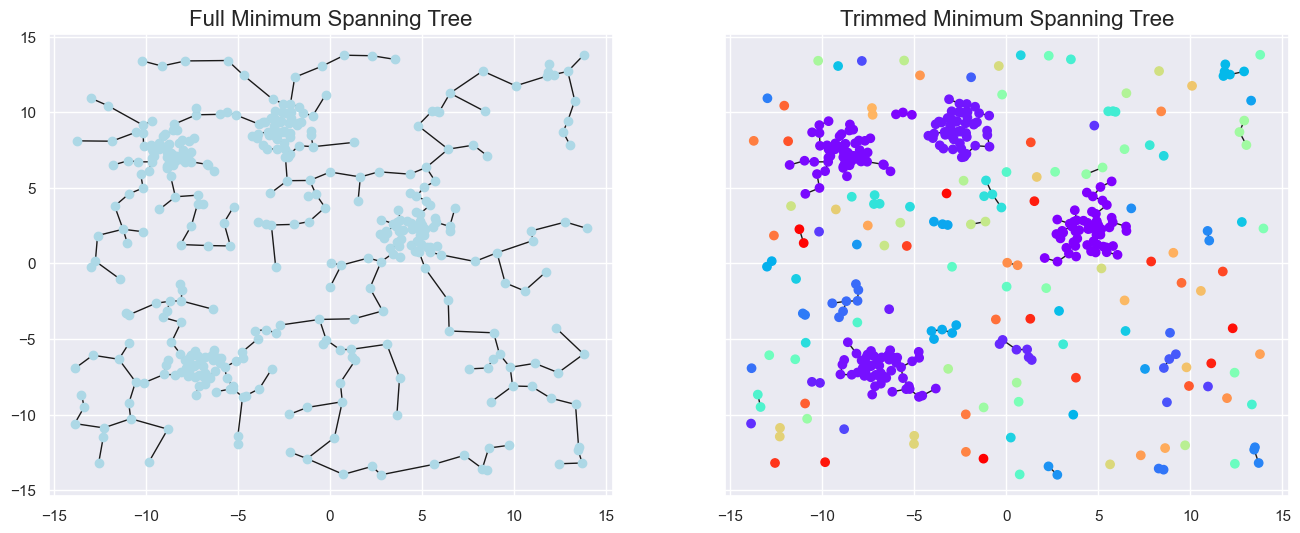

In [9]:
noisy_model = MSTClustering(cutoff_scale=1)
noisy_model.fit(X_noisy)
plot_mst(noisy_model)

Khi cắt hết các cạnh dài đi, chúng ta đã có được 4 cụm lớn màu tím, nhưng vẫn còn một số cụm đặc biệt bị cô lập và chỉ có vài điểm trong đó. Chúng ta sẽ sử dụng một tham số để chỉ định kích thước cụm tối thiếu (minimun cluster size), các điểm không thuộc về một cụm đủ lớn sẽ có label là -1.

C:\Users\dophi\AppData\Local\Temp\ipykernel_1472\2977907449.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


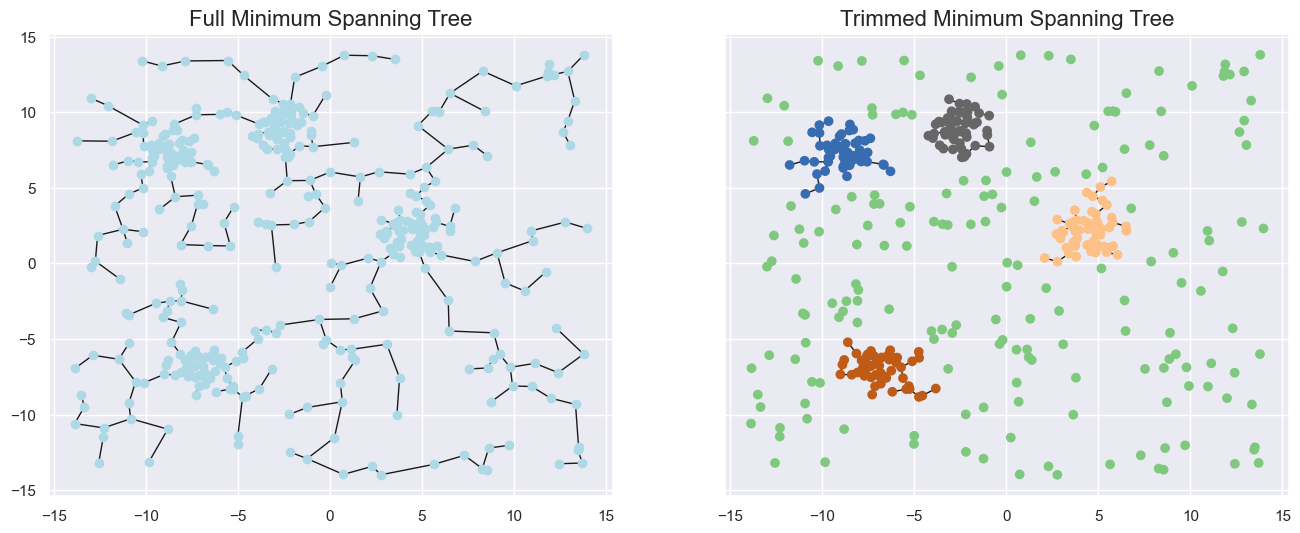

In [10]:
noisy_model = MSTClustering(cutoff_scale=1, min_cluster_size=10)
noisy_model.fit(X_noisy)
plot_mst(noisy_model, cmap='Accent')

Bằng cách tinh chỉnh tham số cutoff_scale và min_cluster_size, chúng ta có thể lấy được các cụm ngay cả trong một noise background.